In [9]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np

print("Jupyter Notebook is now using the virtual environment!")
print("TensorFlow version:", tf.__version__)
print("NumPy version:", np.__version__)


Jupyter Notebook is now using the virtual environment!
TensorFlow version: 2.18.0
NumPy version: 2.0.2


Step 1: Import Required Libraries

In [3]:
# Import necessary libraries
import pickle
import numpy as np
import os
import matplotlib.pyplot as plt

# Set dataset path
DATASET_PATH = r"C:\Users\HP\OneDrive\Desktop\CNN_Project\data\cifar-10-batches-py"

print("Libraries imported successfully!")

Libraries imported successfully!


Step 2: Define functions for loading CIFAR-10

In [4]:
# Function to unpickle CIFAR-10 files
def unpickle(file_name):
    file_path = os.path.join(DATASET_PATH, file_name)
    with open(file_path, 'rb') as fo:
        data_dict = pickle.load(fo, encoding='bytes')
    return data_dict

# Function to load dataset batches
def load_cifar10_data():
    """Loads CIFAR-10 dataset and returns train/test images & labels."""
    
    train_data, train_labels = [], []
    
    # Load all 5 training batches
    for i in range(1, 6):
        batch = unpickle(f"data_batch_{i}")
        train_data.append(batch[b"data"])
        train_labels += batch[b"labels"]

    # Load test batch
    test_batch = unpickle("test_batch")
    test_data = test_batch[b"data"]
    test_labels = test_batch[b"labels"]

    return train_data, train_labels, test_data, test_labels

print("CIFAR-10 loading functions defined successfully!")


CIFAR-10 loading functions defined successfully!


Step 3: Load and preprocess data

In [5]:
# Load dataset
train_data, train_labels, test_data, test_labels = load_cifar10_data()

# Convert to NumPy arrays and reshape
X_train = np.vstack(train_data).reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)
X_test = test_data.reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)

# Normalize pixel values (0-255) to (0-1) and enhance sharpness
X_train = np.clip(X_train / 255.0, 0, 1)
X_test = np.clip(X_test / 255.0, 0, 1)

y_train = np.array(train_labels)
y_test = np.array(test_labels)

print(f"Training Data: {X_train.shape}, Labels: {y_train.shape}")
print(f"Test Data: {X_test.shape}, Labels: {y_test.shape}")

Training Data: (50000, 32, 32, 3), Labels: (50000,)
Test Data: (10000, 32, 32, 3), Labels: (10000,)


Step 4: Visualizing CIFAR-10 Images

In [6]:
# Class labels for CIFAR-10 dataset
LABELS = [
    "airplane", "automobile", "bird", "cat", "deer",
    "dog", "frog", "horse", "ship", "truck"
]

def visualize_samples(X, y, num_samples=5):
    """Displays sample images with their labels."""
    fig, axes = plt.subplots(1, num_samples, figsize=(10, 5))
    for i in range(num_samples):
        axes[i].imshow(np.clip(X[i], 0, 1))  # Improve image sharpness
        axes[i].set_title(LABELS[y[i]])  # Set label title
        axes[i].axis("off")  # Hide axes
    plt.show()

print(" Visualization function defined successfully!")

 Visualization function defined successfully!


Step 5: Display Sample CIFAR-10 Images

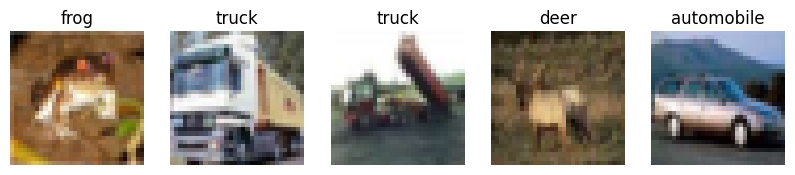

 Sample images displayed successfully!


In [7]:
# Display 5 random training samples
visualize_samples(X_train, y_train)

print(" Sample images displayed successfully!")

Step 6: Defining the CNN Model

In [10]:
# Build the CNN model
cnn_model = keras.Sequential([
    keras.Input(shape=(32, 32, 3)),  # Explicit Input Layer
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 output classes
])

# Print model summary
cnn_model.summary()

print("CNN model defined successfully!")



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 160,202 (625.79 KB)

 Trainable params: 160,202 (625.79 KB)

 Non-trainable params: 0 (0.00 B)

CNN model defined successfully!


Step 7: Compile and Train the CNN Model

In [ ]:


# Compile the model
cnn_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

print("Model compiled successfully!")

# Train the model
history = cnn_model.fit(
    X_train, y_train,
    epochs=10,  # Adjust the number of epochs as needed
    batch_size=64,
    validation_data=(X_test, y_test)
)

print(" Model training completed!")


Model compiled successfully!
Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 26s 27ms/step - accuracy: 0.3178 - loss: 1.8352 - val_accuracy: 0.5136 - val_loss: 1.3469
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 17s 21ms/step - accuracy: 0.5478 - loss: 1.2612 - val_accuracy: 0.6027 - val_loss: 1.1171
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.6190 - loss: 1.0790 - val_accuracy: 0.6185 - val_loss: 1.0889
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 0.6594 - loss: 0.9697 - val_accuracy: 0.6670 - val_loss: 0.9595
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 0.6926 - loss: 0.8775 - val_accuracy: 0.6755 - val_loss: 0.9316
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 0.7198 - loss: 0.7974 - val_accuracy: 0.6915 - val_loss: 0.8979
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 17s 21ms/step - accuracy: 0.7474 - loss: 0.7259 - val_accuracy: 0.6917 - val_loss: 0.9003
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 27s 30ms/step - accur

 Step 8: Evaluate the Model Performance

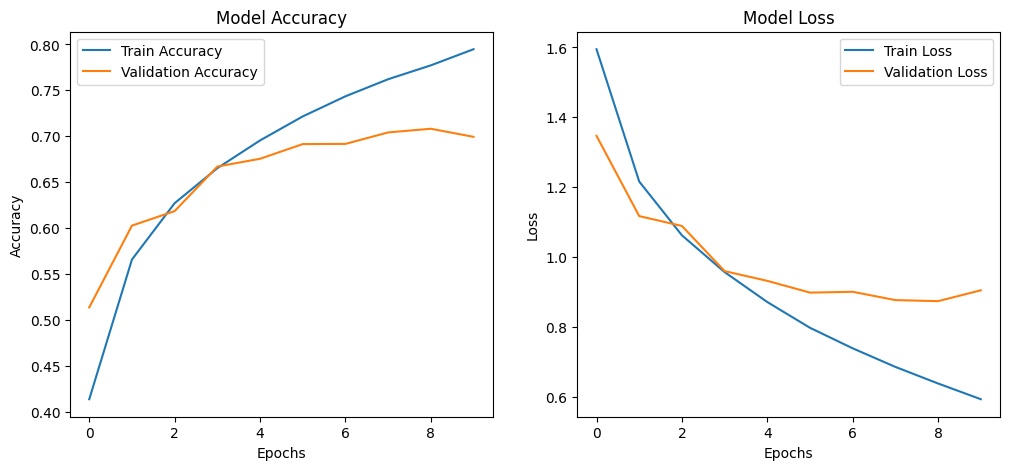

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step


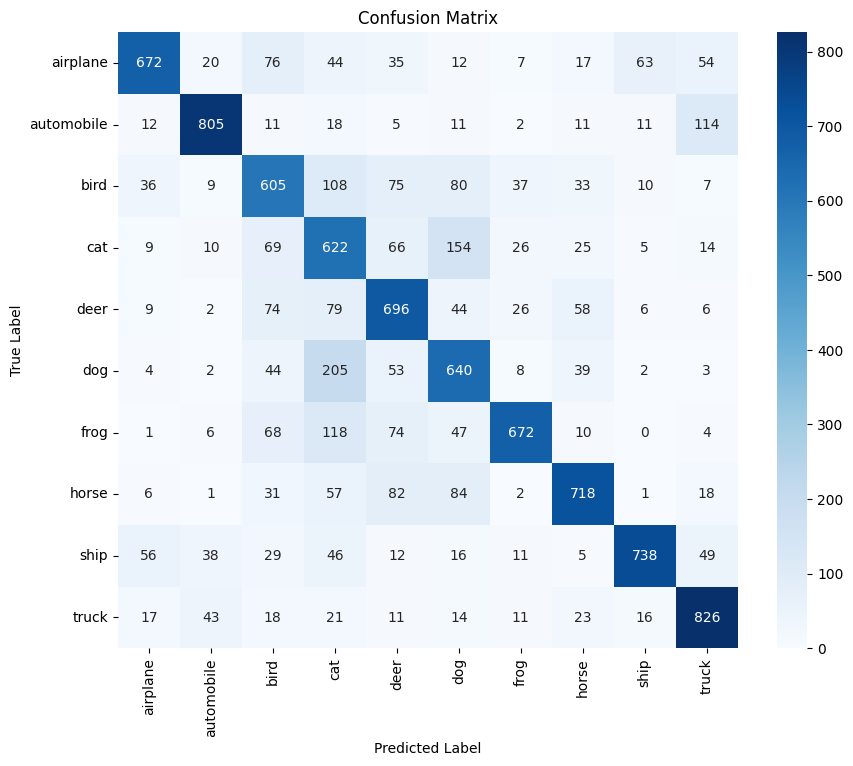

Classification Report:
               precision    recall  f1-score   support

    airplane       0.82      0.67      0.74      1000
  automobile       0.86      0.81      0.83      1000
        bird       0.59      0.60      0.60      1000
         cat       0.47      0.62      0.54      1000
        deer       0.63      0.70      0.66      1000
         dog       0.58      0.64      0.61      1000
        frog       0.84      0.67      0.75      1000
       horse       0.76      0.72      0.74      1000
        ship       0.87      0.74      0.80      1000
       truck       0.75      0.83      0.79      1000

    accuracy                           0.70     10000
   macro avg       0.72      0.70      0.70     10000
weighted avg       0.72      0.70      0.70     10000



In [ ]:
### Step 8: Evaluate Model Performance

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Plot accuracy and loss curves
def plot_training_history(history):
    """Plots accuracy and loss curves for training and validation."""
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))

    # Accuracy plot
    axs[0].plot(history.history['accuracy'], label='Train Accuracy')
    axs[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
    axs[0].set_title('Model Accuracy')
    axs[0].set_xlabel('Epochs')
    axs[0].set_ylabel('Accuracy')
    axs[0].legend()

    # Loss plot
    axs[1].plot(history.history['loss'], label='Train Loss')
    axs[1].plot(history.history['val_loss'], label='Validation Loss')
    axs[1].set_title('Model Loss')
    axs[1].set_xlabel('Epochs')
    axs[1].set_ylabel('Loss')
    axs[1].legend()

    plt.show()

# Call function to plot training history
plot_training_history(history)

# Make predictions
y_pred = cnn_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=LABELS, yticklabels=LABELS)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred_classes, target_names=LABELS))


Step 9: Save and Deploy the Model!

In [11]:
### Step 9: Save the Trained Model

# Save in the new recommended Keras format
model_keras_path = "cnn_cifar10_model.keras"
cnn_model.save(model_keras_path)


print(f" Model saved successfully in Keras formats:\n- {model_keras_path}")



 Model saved successfully in Keras formats:
- cnn_cifar10_model.keras
